In [1]:
# Input:
path_train = '../01 data/emotion-labels-train.csv'
path_test = '../01 data/emotion-labels-test.csv'

In [ ]:
# Data source: https://www.kaggle.com/anjaneyatripathi/emotion-classification-nlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from modules.tf_modules import clean_text
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danamas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danamas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load dataset
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

# Rename the text and label
# train = train.rename(columns={'ori_text': 'text', 'ori_label': 'label'})

print(train.shape)
train.head(3)

(3613, 2)


,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy


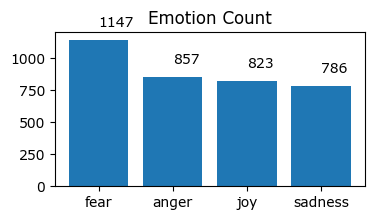

In [6]:
# Plot the label count
plt.figure(figsize=(4,2))
plt.bar(train['label'].value_counts().index, list(train['label'].value_counts()))
for index, value in enumerate(list(train['label'].value_counts())):
    plt.text(index, value+100, str(value))
plt.title('Emotion Count')
plt.show()

In [7]:
# Text cleaning
train['cleaned_text'] = train['text'].apply(clean_text)
test['cleaned_text'] = test['text'].apply(clean_text)
train.head()

,text,label,cleaned_text
0,Just got back from seeing @GaryDelaney in Burs...,joy,get back see burslem amaze face still hurt lau...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear even absolute hilarity dont think laug...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,wait week game cheer friday
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,thank much gloria youre sweet thoughtful make ...
4,I feel so blessed to work with the family that...,joy,feel bless work family nanny nothing love amp ...


In [8]:
# One-hot-encoding the label
labels = pd.get_dummies(train['label'])
train = pd.concat([train, labels], axis=1)
label_list = labels.columns.to_list()
train.head(3)

,text,label,cleaned_text,anger,fear,joy,sadness
0,Just got back from seeing @GaryDelaney in Burs...,joy,get back see burslem amaze face still hurt lau...,0,0,1,0
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear even absolute hilarity dont think laug...,0,0,1,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,wait week game cheer friday,0,0,1,0


In [9]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(
    train['cleaned_text'],
    train[label_list],
    stratify=train['label'],
    test_size=0.2,
    random_state=123
)

In [10]:
# Save
X_train.to_csv('../03 outputs/01/X_train.csv')
X_val.to_csv('../03 outputs/01/X_val.csv')
y_train.to_csv('../03 outputs/01/y_train.csv')
y_val.to_csv('../03 outputs/01/y_val.csv')